In [24]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("framingham.csv")

df.dropna(inplace=True)

X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#creating and training the decision tree

model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=7)
model.fit(X_train, y_train)

# making the predictions
y_pred = model.predict(X_test)

In [28]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       620
           1       0.38      0.04      0.08       112

    accuracy                           0.84       732
   macro avg       0.62      0.52      0.50       732
weighted avg       0.78      0.84      0.79       732




Confusion Matrix:


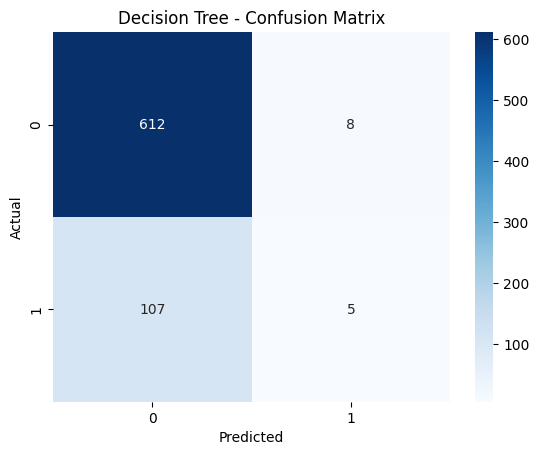

In [29]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

In [30]:
# Train and test accuracy
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"\nTrain Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")



Train Accuracy: 0.8642
Test Accuracy: 0.8429
